# HarvardX‐MITx	  Person-Course	  dataset

In the year from the fall of 2012 to the summer of 2013, the first 17 HarvardX and MITx
courses launched on the edX platform. In that year, 

* 43,196 registrants earned certificates of completion
* Another 35,937 registrants explored half or more of course content without certification
* An additional 469,702 registrants viewed less than half of the content
* And 292,852 registrants never engaged with the online content
* In total, there were 841,687 registrations from 597,692 unique users across the first year of HarvardX and MITx courses

You can download the dataset from here: http://thedata.harvard.edu/dvn/dv/m...ndex=0_a05dab5c0d5644aecf3c973e7b66

# Defining the problem

Predict if a student learnt the course content:
* Earned certificate
* Completed the course

### Machine Learning Problem:

#### Define outcome
* Pre-processing 
    * Data cleaning
    * Extracting features
* Build a model
* Evaluate
    

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
# PLOTLY
import plotly.plotly as py
from plotly.graph_objs import *
#k-means clustering
from scipy.cluster.vq import kmeans,vq
from sklearn.cluster import KMeans

from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn import metrics
from sklearn import ensemble

from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold

# Load data

In [2]:
df = pd.read_csv('/Users/shirin_mojarad/Downloads/HMXPC13_DI_v2_5-14-14.csv')
df.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,2013-11-17,NaN,9,NaN,NaN,0,NaN,1
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-15,NaN,NaN,9,NaN,1,0,NaN,1
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,2013-11-17,NaN,16,NaN,NaN,0,NaN,1
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-09-17,NaN,NaN,16,NaN,NaN,0,NaN,1
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,NaN,NaN,16,NaN,NaN,0,NaN,1


In [3]:
print 'Number of courses: ' + str(df.course_id.nunique())
print 'Number of students: ' + str(df.userid_DI.nunique())

Number of courses: 16
Number of students: 476532


* Registered is only 1
* Roles is all NaN
* Binary columns: viewed, explored, certified  
* Categorical columns: final_cc_cname_DI (country), LoE_DI (education), gender , incomplete_flag 
* Continus columns: YoB (age), grade (0-1), nevents (number of logins),ndays_act, nplay_video, nchapters, nforum_posts
* Date: start_time_DI, last_event_DI

In [4]:
print 'There are ' + str(df.shape[0]) + ' records in data'

There are 641138 records in data


# Pre-processing

### Drop NA

In [5]:
df.fillna(0, inplace=True)
df.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,0,0,0,0,2012-12-19,2013-11-17,0,9,0,0,0,0,1
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,0,0,0,0,2012-10-15,0,0,9,0,1,0,0,1
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,0,0,0,0,2013-02-08,2013-11-17,0,16,0,0,0,0,1
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,0,0,0,0,2012-09-17,0,0,16,0,0,0,0,1
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,0,0,0,0,2012-12-19,0,0,16,0,0,0,0,1


In [6]:
df0 = df.dropna()
print str(df0.shape[0]) + ' records'
print str(df.shape[0]-df0.shape[0]) + ' records with YoB=0 were removed'
print str(((df.shape[0]-df0.shape[0])*100)/df.shape[0]) + '% of records were removed'

641138 records
0 records with YoB=0 were removed
0% of records were removed


### Age

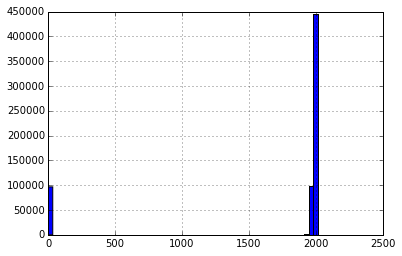

In [7]:
df0['YoB'] = df0['YoB'].astype(float)
df0.YoB.hist(bins=60)
plt.show()

96605 records with YoB=0 were removed
15% of records with YoB=0 were removed


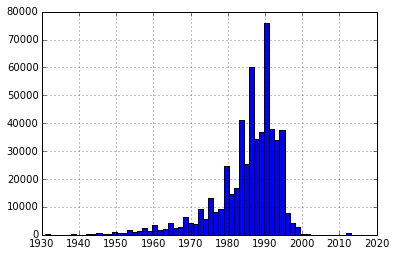

In [8]:
df1 = df0[df.YoB<>0]
print str(df0.shape[0]-df1.shape[0]) + ' records with YoB=0 were removed'
print str(((df0.shape[0]-df1.shape[0])*100)/df0.shape[0]) + '% of records with YoB=0 were removed'
df1.YoB.hist(bins=60)
plt.show()

608 records with YoB=0 were removed
0% of records with YoB=0 were removed


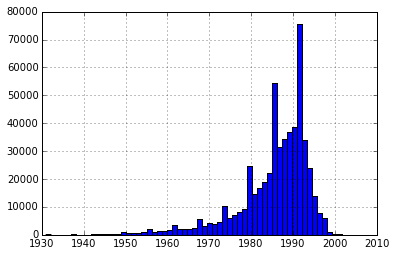

In [9]:
df2 = df1[df1.YoB<=2004]
print str(df1.shape[0]-df2.shape[0]) + ' records with YoB=0 were removed'
print str(((df1.shape[0]-df2.shape[0])*100)/df1.shape[0]) + '% of records with YoB=0 were removed'
df2.YoB.hist(bins=60)
plt.show()

/Users/shirin_mojarad/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/shirin_mojarad/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/shirin_mojarad/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the do

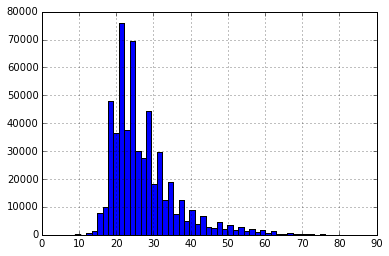

In [10]:
df2['start_year'] = df2.start_time_DI.apply(lambda x: x[0:4])
df2['start_year'] = df2['start_year'].astype(float)
df2['age'] = df2.start_year - df2.YoB
df2.age.hist(bins=50)
plt.show()

### Country

In [11]:
country = df2.groupby('final_cc_cname_DI').size().reset_index().sort(0,ascending=False)
country.columns = ['Country','Count']
country.head()

,Country,Count
32,United States,156107
10,India,78200
33,Unknown/Other,74263
18,Other Europe,33222
16,Other Africa,22240


In [12]:
data = Data([
    Bar(
        x=country.Country,
        y=country.Count
    )
])
py.iplot(data, filename = '4')

In [13]:
country_list = df2.final_cc_cname_DI.unique()
country_list

array(['Unknown/Other', 'United States', 'India', 'Greece', 'Canada',
       'Other Middle East/Central Asia', 'Pakistan', 'Australia',
       'Other South Asia', 'Other Europe', 'Other East Asia', 'Egypt',
       'Other South America', 'Brazil', 'Bangladesh', 'Other Africa',
       'Spain', 'Russian Federation', 'Poland', 'France', 'Germany',
       'United Kingdom', 'Colombia', 'Mexico', 'Nigeria', 'Portugal',
       'Ukraine', 'Philippines', 'Morocco',
       'Other North & Central Amer., Caribbean', 'Indonesia', 'China',
       'Japan', 'Other Oceania'], dtype=object)

In [14]:
english_speaking = ['United States','Australia','India','Canada'
                    ,'United Kingdom', 'Nigeria']

nonenglish_speaking = ['France', 'Unknown/Other', 'Mexico','Russian Federation', 'Other South Asia',
       'Other North & Central Amer., Caribbean', 'Other Europe',
       'Other Oceania', 'Japan', 'Other Africa', 'Colombia', 'Germany',
       'Other Middle East/Central Asia', 'Poland', 'Indonesia',
       'Other East Asia', 'Bangladesh', 'China',
       'Ukraine', 'Spain', 'Greece', 'Pakistan', 'Brazil',
       'Egypt', 'Other South America', 'Portugal', 'Philippines', 'Morocco']

In [15]:
eng_map = dict(zip(english_speaking,np.ones(len(english_speaking))))
noneng_map = dict(zip(nonenglish_speaking,np.zeros(len(nonenglish_speaking))))
noneng_map.update(eng_map)
noneng_map

{'Australia': 1.0,
 'Bangladesh': 0.0,
 'Brazil': 0.0,
 'Canada': 1.0,
 'China': 0.0,
 'Colombia': 0.0,
 'Egypt': 0.0,
 'France': 0.0,
 'Germany': 0.0,
 'Greece': 0.0,
 'India': 1.0,
 'Indonesia': 0.0,
 'Japan': 0.0,
 'Mexico': 0.0,
 'Morocco': 0.0,
 'Nigeria': 1.0,
 'Other Africa': 0.0,
 'Other East Asia': 0.0,
 'Other Europe': 0.0,
 'Other Middle East/Central Asia': 0.0,
 'Other North & Central Amer., Caribbean': 0.0,
 'Other Oceania': 0.0,
 'Other South America': 0.0,
 'Other South Asia': 0.0,
 'Pakistan': 0.0,
 'Philippines': 0.0,
 'Poland': 0.0,
 'Portugal': 0.0,
 'Russian Federation': 0.0,
 'Spain': 0.0,
 'Ukraine': 0.0,
 'United Kingdom': 1.0,
 'United States': 1.0,
 'Unknown/Other': 0.0}

In [16]:
df2['english_speaking'] = df2.final_cc_cname_DI.map(noneng_map)
df2.head()

/Users/shirin_mojarad/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,...,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag,start_year,age,english_speaking
19330,HarvardX/CS50x/2012,MHxPC130422039,1,0,0,0,Unknown/Other,Secondary,1987,m,...,0,0,0,0,0,0,0,2012,25,0
19331,HarvardX/CS50x/2012,MHxPC130407931,1,0,0,0,United States,Secondary,1968,f,...,0,0,0,0,0,0,0,2012,44,1
19332,HarvardX/PH207x/2012_Fall,MHxPC130313697,1,0,0,0,India,Bachelor's,1989,m,...,6,3,0,0,0,0,0,2012,23,1
19333,HarvardX/CS50x/2012,MHxPC130064950,1,0,0,0,Unknown/Other,Master's,1978,m,...,0,0,0,0,0,0,0,2012,34,0
19334,HarvardX/PH207x/2012_Fall,MHxPC130237753,1,1,0,0,United States,Secondary,1993,m,...,107,8,7,2,0,0,0,2012,19,1


### Eduacation

In [17]:
df2.LoE_DI.unique()

array(['Secondary', "Bachelor's", "Master's", 0, 'Doctorate',
       'Less than Secondary'], dtype=object)

In [18]:
education = df2.groupby('LoE_DI').size().reset_index().sort(0,ascending=False)
education.columns = ['educationLevel','Count']
education

,educationLevel,Count
1,Bachelor's,217359
5,Secondary,168634
4,Master's,116418
0,0,14481
3,Less than Secondary,14044
2,Doctorate,12989


In [19]:
data = Data([
    Bar(
        x=education.educationLevel,
        y=education.Count
    )
])
py.iplot(data, filename = 'education bar')

In [20]:
df3 = df2[df2.LoE_DI<>'0']
print str(df2.shape[0]-df3.shape[0]) + ' records with LoE_DI=0 were removed'
print str(((df2.shape[0]-df3.shape[0])*100)/df.shape[0]) + '% of records with LoE_DI=0 were removed'

0 records with LoE_DI=0 were removed
0% of records with LoE_DI=0 were removed


In [21]:
new_map = dict(zip(df3.LoE_DI.unique(),range(len(df3.LoE_DI.unique()))))
new_map

{0: 3,
 "Bachelor's": 1,
 'Doctorate': 4,
 'Less than Secondary': 5,
 "Master's": 2,
 'Secondary': 0}

In [22]:
df3['education'] = df3.LoE_DI.map(new_map)
df3.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,...,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag,start_year,age,english_speaking,education
19330,HarvardX/CS50x/2012,MHxPC130422039,1,0,0,0,Unknown/Other,Secondary,1987,m,...,0,0,0,0,0,0,2012,25,0,0
19331,HarvardX/CS50x/2012,MHxPC130407931,1,0,0,0,United States,Secondary,1968,f,...,0,0,0,0,0,0,2012,44,1,0
19332,HarvardX/PH207x/2012_Fall,MHxPC130313697,1,0,0,0,India,Bachelor's,1989,m,...,3,0,0,0,0,0,2012,23,1,1
19333,HarvardX/CS50x/2012,MHxPC130064950,1,0,0,0,Unknown/Other,Master's,1978,m,...,0,0,0,0,0,0,2012,34,0,2
19334,HarvardX/PH207x/2012_Fall,MHxPC130237753,1,1,0,0,United States,Secondary,1993,m,...,8,7,2,0,0,0,2012,19,1,0


### Gender

In [23]:
df3.gender.unique()

array(['m', 'f', 'o'], dtype=object)

In [24]:
gender = df3.groupby('gender').size().reset_index().sort(0,ascending=False)
gender.columns = ['gender','Count']
gender

,gender,Count
1,m,404751
0,f,139169
2,o,5


In [25]:
data = Data([
    Bar(
        x=gender.gender,
        y=gender.Count
    )
])
py.iplot(data, filename = 'gender bar')

In [26]:
df3 = df3[df3.gender<>'o']

In [27]:
df3['genderC'] = df3.gender.map({"m": 0,'f': 1})
df3.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,...,nplay_video,nchapters,nforum_posts,roles,incomplete_flag,start_year,age,english_speaking,education,genderC
19330,HarvardX/CS50x/2012,MHxPC130422039,1,0,0,0,Unknown/Other,Secondary,1987,m,...,0,0,0,0,0,2012,25,0,0,0
19331,HarvardX/CS50x/2012,MHxPC130407931,1,0,0,0,United States,Secondary,1968,f,...,0,0,0,0,0,2012,44,1,0,1
19332,HarvardX/PH207x/2012_Fall,MHxPC130313697,1,0,0,0,India,Bachelor's,1989,m,...,0,0,0,0,0,2012,23,1,1,0
19333,HarvardX/CS50x/2012,MHxPC130064950,1,0,0,0,Unknown/Other,Master's,1978,m,...,0,0,0,0,0,2012,34,0,2,0
19334,HarvardX/PH207x/2012_Fall,MHxPC130237753,1,1,0,0,United States,Secondary,1993,m,...,7,2,0,0,0,2012,19,1,0,0


### Grade

In [28]:
#df3.grade[X.grade==0] = 0 
df4 = df3[df3.grade<>' '] 
print str(df3.shape[0]-df4.shape[0]) + ' records with null grade were removed'
print str(((df3.shape[0]-df4.shape[0])*100)/df.shape[0]) + '% of records with null grade were removed'

8279 records with null grade were removed
1% of records with null grade were removed


In [29]:
grade = df4.groupby('grade').size().reset_index().sort(0,ascending=False)
grade.columns = ['grade','Count']
data = Data([
    Bar(
        x=grade.grade,
        y=grade.Count
    )
])
py.iplot(data, filename = 'grade bar')

In [30]:
df4.grade = df4.grade.astype(float)

/Users/shirin_mojarad/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:1974: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## Input and Output 

In [31]:
X = df4[['viewed', 'explored','english_speaking', 'education', 'genderC', 
         'age', 'nevents','ndays_act', 'nplay_video', 'nchapters', 'nforum_posts','grade']]

y = df4[['incomplete_flag']]
X = X.reset_index()
y = y.reset_index()
y = y.drop('index',1)
X = X.drop('index',1)

In [32]:
X.describe()

,viewed,explored,english_speaking,education,genderC,age,nevents,ndays_act,nplay_video,nchapters,nforum_posts,grade
count,535641.000000,535641.000000,535641.000000,535641.000000,535641.000000,535641.000000,535641.000000,535641.000000,535641.000000,535641.000000,535641.000000,535641.000000
mean,0.618119,0.058539,0.509334,1.131978,0.254359,27.279086,269.297569,3.940051,30.234258,2.078945,0.012673,0.029132
std,0.485848,0.234760,0.499913,1.115129,0.435501,8.811658,1149.507448,9.678453,191.842946,3.777833,0.152224,0.140364
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,0.000000,25.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,2.000000,1.000000,30.000000,60.000000,3.000000,2.000000,2.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,5.000000,1.000000,82.000000,53180.000000,205.000000,34596.000000,47.000000,6.000000,1.010000


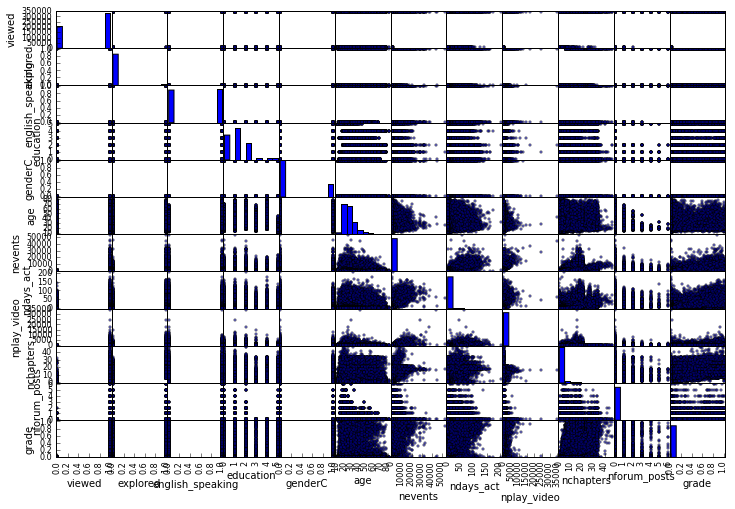

In [35]:
#CORR PLOT
_ = pd.scatter_matrix(X.loc[:,'viewed':'grade'], figsize=(12,8))

# Building a classifier

## Dividing data to training and test set

In [36]:
# dividing data to training and testing
sss = StratifiedShuffleSplit(y, 3, test_size=0.25, random_state=110)
X1 = X.values
y1 = y.values
for train_index, test_index in sss:
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y1[train_index], y1[test_index]

In [37]:
print str(X_train.shape[0]) + ' training records'
print str(X_test.shape[0]) + ' test records'

401730 training records
133911 test records


## Classification

### Gradient boosting trees

In [38]:
# Gradient Boosting Classifier
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_train, y_train)

/Users/shirin_mojarad/anaconda/lib/python2.7/site-packages/sklearn/ensemble/gradient_boosting.py:1127: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [39]:
# accuracy
training_accuracy = metrics.accuracy_score(y_train, gbc.predict(X_train))
testing_accuracy = metrics.accuracy_score(y_test, gbc.predict(X_test))
print "training and testing accuracies are: ", int(training_accuracy*100), "% and ", int(testing_accuracy*100),"%"

training and testing accuracies are:  100 % and  100 %


In [40]:
# Plot feature importance
feature_importance = gbc.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_improtance_sorted = pd.DataFrame(feature_importance)
feature_improtance_sorted.columns = ['importance']
feature_improtance_sorted['features'] = ['viewed','explored','english_speaking','education','genderC','age','nevents','ndays_act','nplay_video','nchapters','nforum_posts','grade']
feature_improtance_sorted = feature_improtance_sorted.sort(columns='importance',ascending = False)

In [41]:
data = Data([
    Bar(
        x=feature_improtance_sorted.features,
        y=feature_improtance_sorted.importance
    )
])
py.iplot(data, filename = 'feature importance')

### 100% is suspicious!!

In [42]:
Z = df4[['viewed', 'explored','english_speaking', 'education', 'genderC', 
         'age', 'nevents','ndays_act', 'nplay_video', 'nchapters', 'nforum_posts','grade','incomplete_flag']]

In [43]:
Z.corr()

,viewed,explored,english_speaking,education,genderC,age,nevents,ndays_act,nplay_video,nchapters,nforum_posts,grade,incomplete_flag
viewed,1.000000,0.195915,0.053027,0.004908,-0.059511,-0.011965,0.183093,0.233951,0.123869,0.427540,0.064678,0.163132,0.129115
explored,0.195915,1.000000,0.009629,0.018454,-0.009070,0.006043,0.587412,0.641959,0.366619,0.784518,0.094591,0.686022,-0.071085
english_speaking,0.053027,0.009629,1.000000,0.040742,0.062126,0.173996,0.009018,0.032034,-0.005740,0.027193,0.066500,0.008093,-0.071068
education,0.004908,0.018454,0.040742,1.000000,0.039033,0.235225,0.025664,0.029021,0.026251,0.023973,-0.012965,0.020661,-0.007565
genderC,-0.059511,-0.009070,0.062126,0.039033,1.000000,0.062323,0.005888,-0.005196,0.004320,-0.020920,-0.003734,0.021487,-0.033940
age,-0.011965,0.006043,0.173996,0.235225,0.062323,1.000000,0.004063,0.017305,0.005911,0.012809,-0.028013,-0.006900,0.003085
nevents,0.183093,0.587412,0.009018,0.025664,0.005888,0.004063,1.000000,0.817833,0.734941,0.609303,0.129147,0.705927,-0.101418
ndays_act,0.233951,0.641959,0.032034,0.029021,-0.005196,0.017305,0.817833,1.000000,0.549119,0.691115,0.141773,0.725641,-0.108045
nplay_video,0.123869,0.366619,-0.005740,0.026251,0.004320,0.005911,0.734941,0.549119,1.000000,0.357598,0.077552,0.421966,-0.067686
nchapters,0.427540,0.784518,0.027193,0.023973,-0.020920,0.012809,0.609303,0.691115,0.357598,1.000000,0.142763,0.686544,-0.086166


## Logistic Regression

In [44]:
from sklearn import linear_model, datasets
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
# accuracy
training_accuracy = metrics.accuracy_score(y_train, gbc.predict(X_train))
testing_accuracy = metrics.accuracy_score(y_test, gbc.predict(X_test))
print "training and testing accuracies are: ", int(training_accuracy*100), "% and ", int(testing_accuracy*100),"%"

training and testing accuracies are:  100 % and  100 %


/Users/shirin_mojarad/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



## Normalize data

In [45]:
X_scaled = preprocessing.scale(X)
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.columns = ['viewed','explored','english_speaking','education','genderC','age','nevents','ndays_act','nplay_video','nchapters','nforum_posts','grade']
X_scaled_df.describe()

,viewed,explored,english_speaking,education,genderC,age,nevents,ndays_act,nplay_video,nchapters,nforum_posts,grade
count,5.356410e+05,5.356410e+05,5.356410e+05,5.356410e+05,5.356410e+05,5.356410e+05,5.356410e+05,5.356410e+05,5.356410e+05,5.356410e+05,5.356410e+05,5.356410e+05
mean,9.508552e-17,4.308563e-17,1.485711e-18,7.598352e-17,-6.770598e-17,1.023018e-16,-7.152638e-17,2.355914e-17,-1.135508e-17,-1.379589e-17,2.377138e-17,-3.395911e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.272249e+00,-2.493574e-01,-1.018845e+00,-1.015111e+00,-5.840613e-01,-2.074423e+00,-2.342724e-01,-4.070955e-01,-1.575992e-01,-5.503013e-01,-8.325004e-02,-2.075491e-01
25%,-1.272249e+00,-2.493574e-01,-1.018845e+00,-1.015111e+00,-5.840613e-01,-7.125892e-01,-2.342724e-01,-4.070955e-01,-1.575992e-01,-5.503013e-01,-8.325004e-02,-2.075491e-01
50%,7.860095e-01,-2.493574e-01,9.815037e-01,-1.183526e-01,-5.840613e-01,-2.586447e-01,-2.316625e-01,-3.037731e-01,-1.575992e-01,-2.855991e-01,-8.325004e-02,-2.075491e-01
75%,7.860095e-01,-2.493574e-01,9.815037e-01,7.784055e-01,1.712149e+00,3.087860e-01,-1.820760e-01,-9.712835e-02,-1.471739e-01,-2.089683e-02,-8.325004e-02,-2.075491e-01
max,7.860095e-01,4.010308e+00,9.815037e-01,3.468680e+00,1.712149e+00,6.210065e+00,4.602906e+01,2.077400e+01,1.801776e+02,1.189070e+01,3.933231e+01,6.988033e+00


# k-means Clustering

### Elbow Curve

In [46]:
##### cluster data into K=1..10 clusters #####
K = range(2,10)
KM = [kmeans(X_scaled,k) for k in K]
centroids = [cent for (cent,var) in KM]   # cluster centroids
avgWithinSS = [var for (cent,var) in KM] # mean within-cluster sum of squares

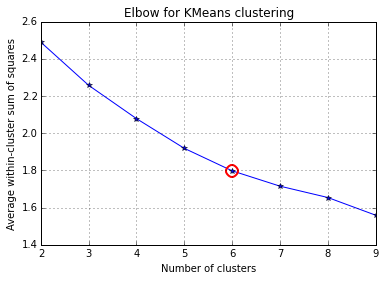

In [47]:
##### elbow curve #####
kIdx = 4
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
fig.savefig("elbow.png")
plt.show()

### Clustering

In [48]:
##### k-means #####
k = 6
km = KMeans(n_clusters = k)
km.fit(X_scaled_df)
cluster = pd.DataFrame(km.labels_)
cluster.columns = ['ClusterLabel']
cluster = X.join(cluster)

In [50]:
alist = []
cluster = cluster.dropna()
for i in cluster['ClusterLabel'].unique():
    a = cluster[['viewed','explored','english_speaking','education','genderC','age','nevents','ndays_act','nplay_video','nchapters','nforum_posts','grade']][cluster['ClusterLabel']==i].mean()
    alist.append(a)
pd.DataFrame(alist)

,viewed,explored,english_speaking,education,genderC,age,nevents,ndays_act,nplay_video,nchapters,nforum_posts,grade
0,0.584365,0.000000,0.000000,1.071762,0.000000,25.757837,83.343993,2.028958,11.461285,1.265145,0.001298,0.003219
1,0.541861,0.000000,0.561552,1.198438,1.000000,28.221325,89.377863,2.330522,10.616634,1.194634,0.005122,0.005011
2,0.637044,0.000000,1.000000,1.135003,0.000000,28.199698,105.682463,2.624296,12.728527,1.433456,0.008180,0.004151
3,0.999456,0.956300,0.532105,1.166220,0.226162,27.339766,1327.627961,18.060109,88.524571,13.135998,0.024194,0.300627
4,1.000000,0.975409,0.488189,1.357359,0.275954,27.871108,7629.970563,58.577832,960.245306,15.804603,0.063356,0.739712
5,0.998513,0.340520,0.947955,0.946468,0.209665,23.747212,2108.818587,21.636431,204.074349,9.124164,2.443866,0.222796


In [51]:
cluster = y.join(cluster)
cluster.head()

,incomplete_flag,viewed,explored,english_speaking,education,genderC,age,nevents,ndays_act,nplay_video,nchapters,nforum_posts,grade,ClusterLabel
0,0,0,0,0,0,0,25,0,0,0,0,0,0,2
1,0,0,0,1,0,1,44,0,0,0,0,0,0,3
2,0,0,0,1,1,0,23,6,3,0,0,0,0,0
3,0,0,0,0,2,0,34,0,0,0,0,0,0,2
4,0,1,0,1,0,0,19,107,8,7,2,0,0,0


* Group 3 with high incomeplete rate has below characteristics:
    * Less views
    * High % of non-English speaking
    * Low number of active days